In [11]:
import io
import sys
PATH = "D:/OneDrive - Universidad Tecnológica de Bolívar/Apps/NaturalLanguageProcessing-MING-2903/"
DIR_DATA = PATH + "data/"
sys.path.append(PATH) if PATH not in list(sys.path) else None
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer
from logic.text_processing import TextProcessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [12]:
tp = TextProcessing()

In [13]:
raw_data = pd.read_csv(DIR_DATA + 'TASS2018.csv', sep=';')
raw_data

,tweetid,user,content,date,lang,polarity
0,770976639173951488,noseashetero,@noseashetero 1000/10 de verdad a ti que voy a...,31/08/2016 13:28,es,P
1,771092421866389508,Templelx,@piscolabisaereo @HistoriaNG @SPosteguillo las...,31/08/2016 21:08,es,P
2,771092111429083136,esskuu94,"Al final han sido 3h Bueno, mañana tengo fies...",31/08/2016 21:07,es,P
3,771092070572449796,__ariadna9,@Jorge_Ruiz14 yo no tengo tiempo para esas cos...,31/08/2016 21:07,es,N
4,771094192508600320,_cristtina15_,@_MissChaotic_ ves ese brillo? es un coso que ...,31/08/2016 21:15,es,N
...,...,...,...,...,...,...
501,757593585634213888,RubenRuCh,@Davorias Pero es que está muy rica,25/07/2016 15:09,es,P
502,757585725764362240,rayjaken,@narvalillo Eso es antiguo ya,25/07/2016 14:38,es,N
503,757097408304148480,Fuhyo__,Mi TL esta vacía a estas horas,24/07/2016 6:17,es,N
504,757971881077182464,xLytherinDovah,"Ya tengo uno, pero ese es más cheto @aweamasome.",26/07/2016 16:12,es,NEU


In [14]:
y = raw_data['polarity']
y

0        P
1        P
2        P
3        N
4        N
      ... 
501      P
502      N
503      N
504    NEU
505      N
Name: polarity, Length: 506, dtype: object

In [15]:
corpus = [tp.transformer(row) for row in raw_data['content'].tolist()]
corpus

['mention de verdad a ti que voy a decir petarda que te quiero mas que a mi mismo',
 'mention mention mention las tengo pero aun no las he leido. caeran prontito',
 'al final han sido 3h bueno manana tengo fiesta asi que.. no me quejo',
 'mention yo no tengo tiempo para esas cosas ahora mismo',
 'mention ves ese brillo es un coso que hace que se sepan a kk',
 'tengo una perrina adorable... sabeis que me acompana hasta la a habitacion cuando me voy a dormir',
 'mention es que en el ojeando el ano pasado tampoco tiene muchas canciones ya jajajajaja',
 'bueno estoy en la batalla final del conquista y ya despues me faltaria revelacion',
 'mention manana sabado en que dia vives manana es miercoles 31.',
 'mention y el caminante ante el mar de niebla uno de mis cuadros favoritos en portada',
 'mention si y me ha encantado tu ya las visto cuando comentamos',
 'mention se me olvidaban los grandes mention y mention a ver si os interesa es hilillo',
 'mention mejor si pones un link a la cuenta m

In [16]:
bow = CountVectorizer(analyzer='word', ngram_range=(1, 1), token_pattern='[a-zA-Z][a-zA-Z]{3,}')

In [17]:
bow.fit(corpus)

CountVectorizer(token_pattern='[a-zA-Z][a-zA-Z]{3,}')

In [18]:
x = bow.transform(corpus).toarray()

In [20]:
df = pd.DataFrame(x, index=['twitt '+str(i) for i in range(1, 1+len(corpus))], columns=bow.get_feature_names())

In [21]:
df

,aaaa,abarcar,abedul,abel,abiertas,abiertos,abocado,abrazo,abrir,abro,...,wifi,wiktionary,williams,windows,wolf,wuouuoo,youtube,zack,zona,zonas
twitt 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twitt 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twitt 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twitt 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twitt 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
twitt 502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twitt 503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twitt 504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
twitt 505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
gnb = GaussianNB()

In [26]:
gnb.fit(x_train, y_train)

GaussianNB()

In [27]:
Counter(y_train)

Counter({'P': 117, 'NEU': 52, 'N': 145, 'NONE': 40})

In [29]:
Counter(y_test)

Counter({'NONE': 22, 'N': 74, 'P': 39, 'NEU': 17})

In [32]:
list(y_test)

['NONE',
 'NONE',
 'N',
 'N',
 'NONE',
 'N',
 'N',
 'P',
 'NEU',
 'N',
 'NEU',
 'P',
 'N',
 'N',
 'N',
 'NONE',
 'P',
 'N',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'N',
 'P',
 'N',
 'NONE',
 'N',
 'NONE',
 'N',
 'N',
 'N',
 'NONE',
 'N',
 'N',
 'P',
 'NONE',
 'P',
 'NONE',
 'NONE',
 'P',
 'N',
 'N',
 'N',
 'P',
 'N',
 'N',
 'NONE',
 'N',
 'P',
 'P',
 'NONE',
 'NONE',
 'N',
 'NONE',
 'NONE',
 'N',
 'N',
 'NEU',
 'N',
 'P',
 'P',
 'NEU',
 'P',
 'P',
 'P',
 'NEU',
 'N',
 'N',
 'N',
 'P',
 'P',
 'N',
 'N',
 'P',
 'N',
 'P',
 'P',
 'N',
 'N',
 'NONE',
 'NEU',
 'P',
 'P',
 'N',
 'N',
 'P',
 'N',
 'NONE',
 'N',
 'N',
 'N',
 'P',
 'NONE',
 'N',
 'N',
 'NEU',
 'P',
 'N',
 'N',
 'N',
 'P',
 'N',
 'N',
 'N',
 'NEU',
 'N',
 'N',
 'P',
 'N',
 'N',
 'NONE',
 'NEU',
 'N',
 'P',
 'NEU',
 'P',
 'NEU',
 'N',
 'N',
 'N',
 'N',
 'P',
 'P',
 'N',
 'N',
 'P',
 'N',
 'NEU',
 'N',
 'N',
 'P',
 'NONE',
 'N',
 'N',
 'N',
 'N',
 'P',
 'N',
 'P',
 'N',
 'P',
 'N',
 'NONE',
 'NEU',
 'P',
 'N',
 'NONE',
 'N',
 'N',
 'P',


In [33]:
y_predict = gnb.predict(x_test)
y_predict

array(['NONE', 'N', 'NEU', 'NEU', 'NEU', 'N', 'NEU', 'P', 'N', 'NONE',
       'P', 'NONE', 'P', 'N', 'N', 'NEU', 'P', 'N', 'P', 'P', 'NONE', 'N',
       'N', 'P', 'P', 'N', 'P', 'P', 'NEU', 'NONE', 'P', 'NEU', 'P', 'P',
       'N', 'NEU', 'P', 'N', 'N', 'NONE', 'NONE', 'N', 'NONE', 'P', 'NEU',
       'N', 'NONE', 'NEU', 'N', 'NEU', 'P', 'N', 'N', 'NEU', 'N', 'NONE',
       'P', 'NEU', 'P', 'N', 'P', 'P', 'P', 'N', 'NEU', 'P', 'P', 'N',
       'N', 'NONE', 'N', 'NEU', 'N', 'NEU', 'N', 'P', 'P', 'N', 'P',
       'NONE', 'N', 'P', 'P', 'P', 'P', 'P', 'NONE', 'NONE', 'P', 'NONE',
       'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'N', 'NONE',
       'N', 'P', 'NONE', 'NEU', 'P', 'P', 'N', 'NEU', 'N', 'NEU', 'P',
       'N', 'NEU', 'N', 'P', 'N', 'NEU', 'NEU', 'P', 'P', 'P', 'NEU', 'N',
       'P', 'P', 'NONE', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'P', 'P', 'P',
       'N', 'NEU', 'NEU', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P'], dtype='<U4')

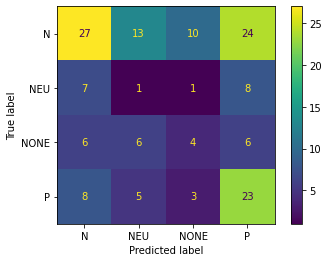

In [34]:
plot_confusion_matrix(gnb, x_test, y_test) 
plt.show()  

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           N       0.56      0.36      0.44        74
         NEU       0.04      0.06      0.05        17
        NONE       0.22      0.18      0.20        22
           P       0.38      0.59      0.46        39

    accuracy                           0.36       152
   macro avg       0.30      0.30      0.29       152
weighted avg       0.41      0.36      0.37       152



In [35]:
f1 = f1_score(y_test, y_predict, average="macro")
precision = precision_score(y_test, y_predict, average="macro")
recall = recall_score(y_test, y_predict, average="macro")
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)

F1:  0.2875604996096799
Precision:  0.30044285063752274
Recall:  0.2988125414596003
